# notebook outline

The goal of this project was to search for statistical differences between male and female-authored sex stories. In this notebook, I score each sex story based on its vocabulary. I use the sentiment and emotion lexicons (http://sentiment.nrc.ca/lexicons-for-research/) to source the score. 

I normalize these scores by dividing them by the length of the story. 

Finally, I compare the scores of male and female-authored stories. 

There are four types of scores, based on the VAD (NRC Valence, Arousal, and Dominance (VAD) Lexicon) and the NRC Emotion Lexicon. Some definitions: 

    valence is the positive--negative or pleasure--displeasure dimension;
    arousal is the excited--calm or active--passive dimension; and
    dominance is the powerful--weak or 'have full control'--'have no control' dimension.


# progress bar
because I don't like waiting
source - https://github.com/kuk/log-progress

In [ ]:
def log_progress(sequence, every=None, size=None, name='Items'):
    from ipywidgets import IntProgress, HTML, VBox
    from IPython.display import display

    is_iterator = False
    if size is None:
        try:
            size = len(sequence)
        except TypeError:
            is_iterator = True
    if size is not None:
        if every is None:
            if size <= 200:
                every = 1
            else:
                every = int(size / 200)     # every 0.5%
    else:
        assert every is not None, 'sequence is iterator, set every'

    if is_iterator:
        progress = IntProgress(min=0, max=1, value=1)
        progress.bar_style = 'info'
    else:
        progress = IntProgress(min=0, max=size, value=0)
    label = HTML()
    box = VBox(children=[label, progress])
    display(box)

    index = 0
    try:
        for index, record in enumerate(sequence, 1):
            if index == 1 or index % every == 0:
                if is_iterator:
                    label.value = '{name}: {index} / ?'.format(
                        name=name,
                        index=index
                    )
                else:
                    progress.value = index
                    label.value = u'{name}: {index} / {size}'.format(
                        name=name,
                        index=index,
                        size=size
                    )
            yield record
    except:
        progress.bar_style = 'danger'
        raise
    else:
        progress.bar_style = 'success'
        progress.value = index
        label.value = "{name}: {index}".format(
            name=name,
            index=str(index or '?')
        )

# opening VAD lexicon documents

In [97]:
f = open("NRC-VAD-Lexicon/OneFilePerDimension/a-scores.txt",'r')
a = f.read()
f = open("NRC-VAD-Lexicon/OneFilePerDimension/d-scores.txt",'r')
d = f.read()
f = open("NRC-VAD-Lexicon/OneFilePerDimension/v-scores.txt",'r')
v = f.read()

opening stories

In [ ]:
import json
with open('data_words.json', 'r') as myfile:
    data=myfile.read()
data_words = json.loads(data) 

base function used for constructing dictionary of words and their VAD scores

In [ ]:
def construct_dict(vo):
    dict_word = {}
    for item in vo.split('\n')[0:1]:
        k = item[0]
        v = item [1]
        dict_word[k] = v
    return dict_word

# valence - make dictionary and score based on words in text

In [124]:
dict_word_v = {}
for item in v.split('\n'):
    try:
        item = item.split('\t')
#         print(item)
        k = item[0]
        va = item [1]
        dict_word_v[k] = va
    except:
        pass

In [125]:
def story_v_score(story_text_list, dict_word_stemmed = dict_word_v):
#     story = [ps.stem(i) for i in story_text_list]
    story = story_text_list
    c = Counter(story)
    w_scores = 0
    
    for w in c:
#         print(w)
        word = w
        freq = c[w]
        if word in dict_word_stemmed:
            count = float(dict_word_stemmed[word])
            score = count * freq
            w_scores += score
#         print(w_scores)
        #w_scores = sum(w_scores)
    return(w_scores)
        

In [126]:
story_v_scores = []
for story in log_progress(data_words):
    story_v_scores.append(story_v_score(story))
#     print(story_v_score(story))


In [114]:
import pandas as pd

In [131]:
master_df['raw_v_score'] = story_v_scores
master_df.to_csv("master_df.csv")

In [132]:
master_df.columns

Index(['Unnamed: 0', 'story_text', 'story_url', 'author_url', 'story_metadata',
       'name', 'stats', 'sex', 'age', 'date', 'category', 'avg_score',
       'word_count', 'tags', 'votes', 'raw_v_score'],
      dtype='object')

# arousal - make dictionary and score based on words in text

In [133]:
dict_word_a = {}
for item in a.split('\n'):
#     print(item)
    try:
#         print('try')
        item = item.split('\t')
#         print(item)
        k = item[0]
        va = item [1]
        dict_word_a[k] = va
    except:
        pass

In [134]:
def story_a_score(story_text_list, dict_word_stemmed = dict_word_a):
#     story = [ps.stem(i) for i in story_text_list]
    story = story_text_list
    c = Counter(story)
    w_scores = 0
    
    for w in c:
#         print(w)
        word = w
        freq = c[w]
        if word in dict_word_stemmed:
            count = float(dict_word_stemmed[word])
            score = count * freq
            w_scores += score
#         print(w_scores)
        #w_scores = sum(w_scores)
    return(w_scores)

In [135]:
story_a_scores = []
for story in log_progress(data_words):
    story_a_scores.append(story_a_score(story))
#     print(story_v_score(story))

In [136]:
master_df['raw_a_score'] = story_a_scores
master_df.to_csv("master_df.csv")

In [137]:
master_df.columns

Index(['Unnamed: 0', 'story_text', 'story_url', 'author_url', 'story_metadata',
       'name', 'stats', 'sex', 'age', 'date', 'category', 'avg_score',
       'word_count', 'tags', 'votes', 'raw_v_score', 'raw_a_score'],
      dtype='object')

# dominance - make dictionary and score based on words in text

In [122]:
dict_word_d = {}
for item in d.split('\n'):
#     print(item)
    try:
#         print('try')
        item = item.split('\t')
#         print(item)
        k = item[0]
        va = item [1]
        dict_word_d[k] = va
    except:
        pass

In [153]:
def story_d_score(story_text_list, dict_word_stemmed = dict_word_d, ps = PorterStemmer()):
#     story = [ps.stem(i) for i in story_text_list]
    story = story_text_list
    c = Counter(story)
    w_scores = 0
    
    for w in c:
#         print(w)
        word = w
        freq = c[w]
        if word in dict_word_stemmed:
            count = float(dict_word_stemmed[word])
            score = count * freq
            w_scores += score
#         print(w_scores)
        #w_scores = sum(w_scores)
    return(w_scores)

In [141]:
story_d_scores = []
for story in log_progress(data_words):
    story_d_scores.append(story_d_score(story))

In [145]:
master_df['raw_d_score'] = story_d_scores
master_df.to_csv("master_df.csv")

# emotion - make dictionary and score based on words in text

In [146]:
emotions = pd.read_csv("emotions_df.csv")

In [149]:
emotion_words = emotions.words
emotion_score = emotions.total_score
emo_dict = dict(zip(emotion_words, emotion_score))

In [152]:
def story_emo_score(story_text_list, dict_word_stemmed = emo_dict, ps = PorterStemmer()):
#     story = [ps.stem(i) for i in story_text_list]
    story = story_text_list
    c = Counter(story)
    w_scores = 0
    
    for w in c:
#         print(w)
        word = w
        freq = c[w]
        if word in dict_word_stemmed:
            count = float(dict_word_stemmed[word])
            score = count * freq
            w_scores += score
#         print(w_scores)
        #w_scores = sum(w_scores)
    return(w_scores)

In [154]:
story_emo_scores = []
for story in log_progress(data_words):
    story_emo_scores.append(story_emo_score(story))

In [163]:
master_df['raw_emo_score'] = story_emo_scores
master_df.to_csv("master_df.csv")

In [164]:
master_df.columns

Index(['Unnamed: 0', 'story_text', 'story_url', 'author_url', 'story_metadata',
       'name', 'stats', 'sex', 'age', 'date', 'category', 'avg_score',
       'word_count', 'tags', 'votes', 'raw_v_score', 'raw_a_score',
       'raw_d_score', 'raw_emo_score'],
      dtype='object')

# normalizing the scores
divide total score by length of story

In [177]:
lens = []
for story in data_words:
    lens.append(len(story))

In [178]:
import numpy as np

In [185]:
master_df['norm_emo_score'] = np.array(story_emo_scores)/np.array(lens)
master_df['norm_v_score'] = np.array(story_v_scores)/np.array(lens)
master_df['norm_a_score'] = np.array(story_a_scores)/np.array(lens)
master_df['norm_d_score'] = np.array(story_d_scores)/np.array(lens)

C:\Users\yangyang\Documents\UMICH\Python Course Stuff\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
C:\Users\yangyang\Documents\UMICH\Python Course Stuff\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
C:\Users\yangyang\Documents\UMICH\Python Course Stuff\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
C:\Users\yangyang\Documents\UMICH\Python Course Stuff\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: invalid value encountered in true_divide


In [187]:
master_df.to_csv("master_df.csv")

In [202]:
hist, bin_edges = np.histogram(master_df['norm_emo_score'],range=(0,1))

C:\Users\yangyang\Documents\UMICH\Python Course Stuff\Anaconda3\lib\site-packages\numpy\lib\function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\yangyang\Documents\UMICH\Python Course Stuff\Anaconda3\lib\site-packages\numpy\lib\function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


# boxplots of scores

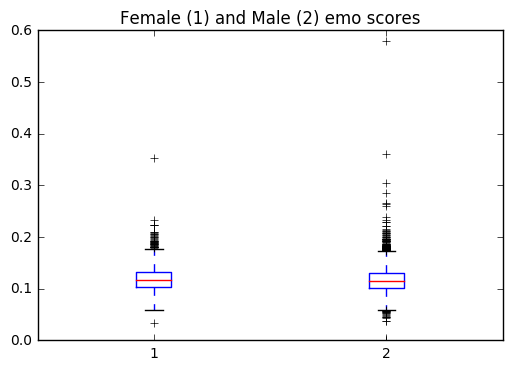

In [307]:
plt.boxplot([master_df[master_df.sex=='F']['norm_emo_score'].dropna(),master_df[master_df.sex=='M']['norm_emo_score'].dropna()])
plt.title("Female (1) and Male (2) emo scores")
plt.show()

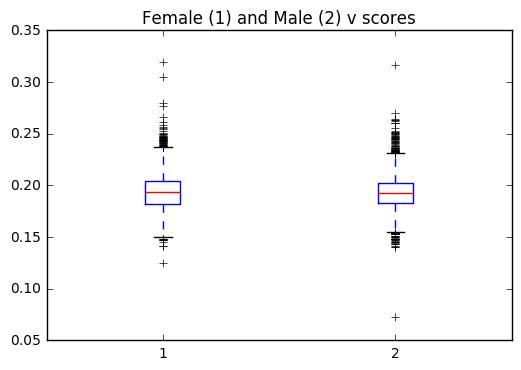

In [308]:
plt.boxplot([master_df[master_df.sex=='F']['norm_v_score'].dropna(),master_df[master_df.sex=='M']['norm_v_score'].dropna()])
plt.title("Female (1) and Male (2) v scores")
plt.show()

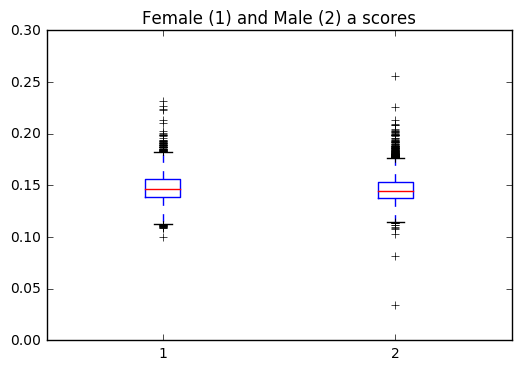

In [309]:
plt.boxplot([master_df[master_df.sex=='F']['norm_a_score'].dropna(),master_df[master_df.sex=='M']['norm_a_score'].dropna()])
plt.title("Female (1) and Male (2) a scores")
plt.show()

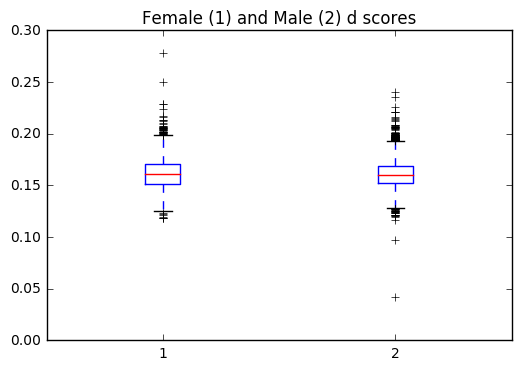

In [310]:
plt.boxplot([master_df[master_df.sex=='F']['norm_d_score'].dropna(),master_df[master_df.sex=='M']['norm_d_score'].dropna()])
plt.title("Female (1) and Male (2) d scores")
plt.show()

# histogram of scores

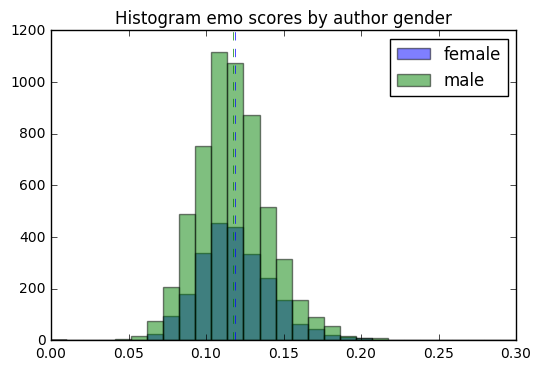

In [279]:
import random
import numpy
from matplotlib import pyplot

x = master_df[master_df.sex=='F']['norm_emo_score'].dropna()
y = master_df[master_df.sex=='M']['norm_emo_score'].dropna()

bins = np.linspace(0, 0.3, 30)

pyplot.hist(x, bins, alpha=0.5, label='female',range=(0,0.3))
pyplot.hist(y, bins, alpha=0.5, label='male',range=(0,0.3))
# plt.hist([x, y], bins, label=['x', 'y'], range = (0,0.3))
plt.axvline(x.mean(), color='b', linestyle='dashed', linewidth=0.5)
plt.axvline(y.mean(), color='g', linestyle='dashed', linewidth=0.5)
plt.title("Histogram emo scores by author gender")
pyplot.legend(loc='upper right')
pyplot.show()

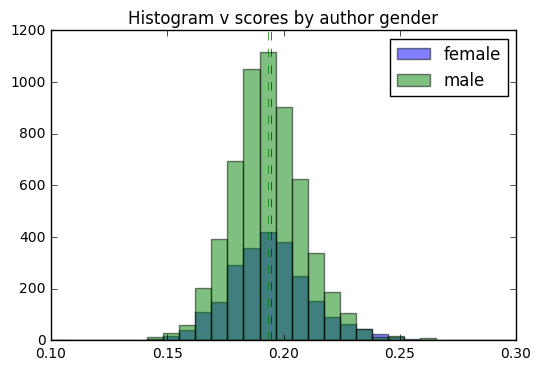

In [293]:
x = master_df[master_df.sex=='F']['norm_v_score'].dropna()
y = master_df[master_df.sex=='M']['norm_v_score'].dropna()

bins = np.linspace(0.1,0.3,30)
# bins = 'auto'

pyplot.hist(x, bins, alpha=0.5, label='female',range=(0.1,0.3))
pyplot.hist(y, bins, alpha=0.5, label='male',range=(0.1,0.3))
# plt.hist([x, y], bins, label=['x', 'y'], range = (0,0.3))
plt.axvline(x.mean(), color='b', linestyle='dashed', linewidth=0.5)
plt.axvline(y.mean(), color='g', linestyle='dashed', linewidth=0.5)
plt.title("Histogram v scores by author gender")
pyplot.legend(loc='upper right')
pyplot.show()

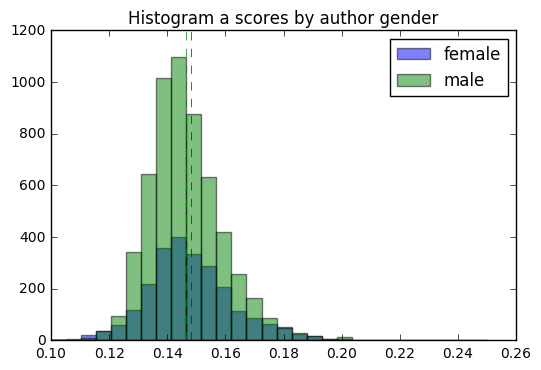

In [295]:
x = master_df[master_df.sex=='F']['norm_a_score'].dropna()
y = master_df[master_df.sex=='M']['norm_a_score'].dropna()

bins = np.linspace(0.1,0.25,30)
# bins = 'auto'

pyplot.hist(x, bins, alpha=0.5, label='female',range=(0.1,0.25))
pyplot.hist(y, bins, alpha=0.5, label='male',range=(0.1,0.25))
# plt.hist([x, y], bins, label=['x', 'y'], range = (0,0.3))
plt.axvline(x.mean(), color='b', linestyle='dashed', linewidth=0.5)
plt.axvline(y.mean(), color='g', linestyle='dashed', linewidth=0.5)
plt.title("Histogram a scores by author gender")
pyplot.legend(loc='upper right')
pyplot.show()

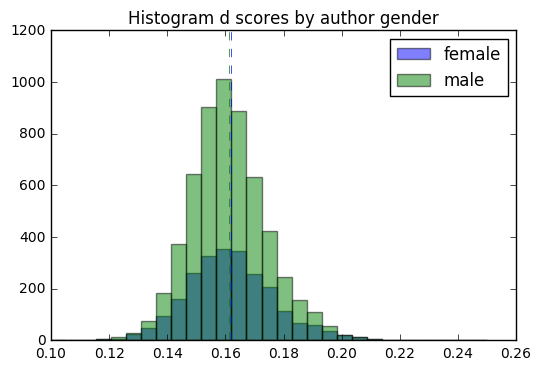

In [298]:
x = master_df[master_df.sex=='F']['norm_d_score'].dropna()
y = master_df[master_df.sex=='M']['norm_d_score'].dropna()

bins = np.linspace(0.1,0.25,30)
# bins = 'auto'

pyplot.hist(x, bins, alpha=0.5, label='female',range=(0.1,0.25))
pyplot.hist(y, bins, alpha=0.5, label='male',range=(0.1,0.25))
# plt.hist([x, y], bins, label=['x', 'y'], range = (0,0.3))
plt.axvline(x.mean(), color='b', linestyle='dashed', linewidth=0.5)
plt.axvline(y.mean(), color='g', linestyle='dashed', linewidth=0.5)
plt.title("Histogram d scores by author gender")
pyplot.legend(loc='upper right')
pyplot.show()